In [2]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


1. There are 730 rows and 16 columns in the data set.
2. "cnt" variable is chosen as Target Variable.
3. There are no null values in the data set, the datatypes of the variables are int/float except "dteday" which is an object.


PAIRPLOT FOR NUMERICAL VARIABLES

<Figure size 1080x720 with 0 Axes>

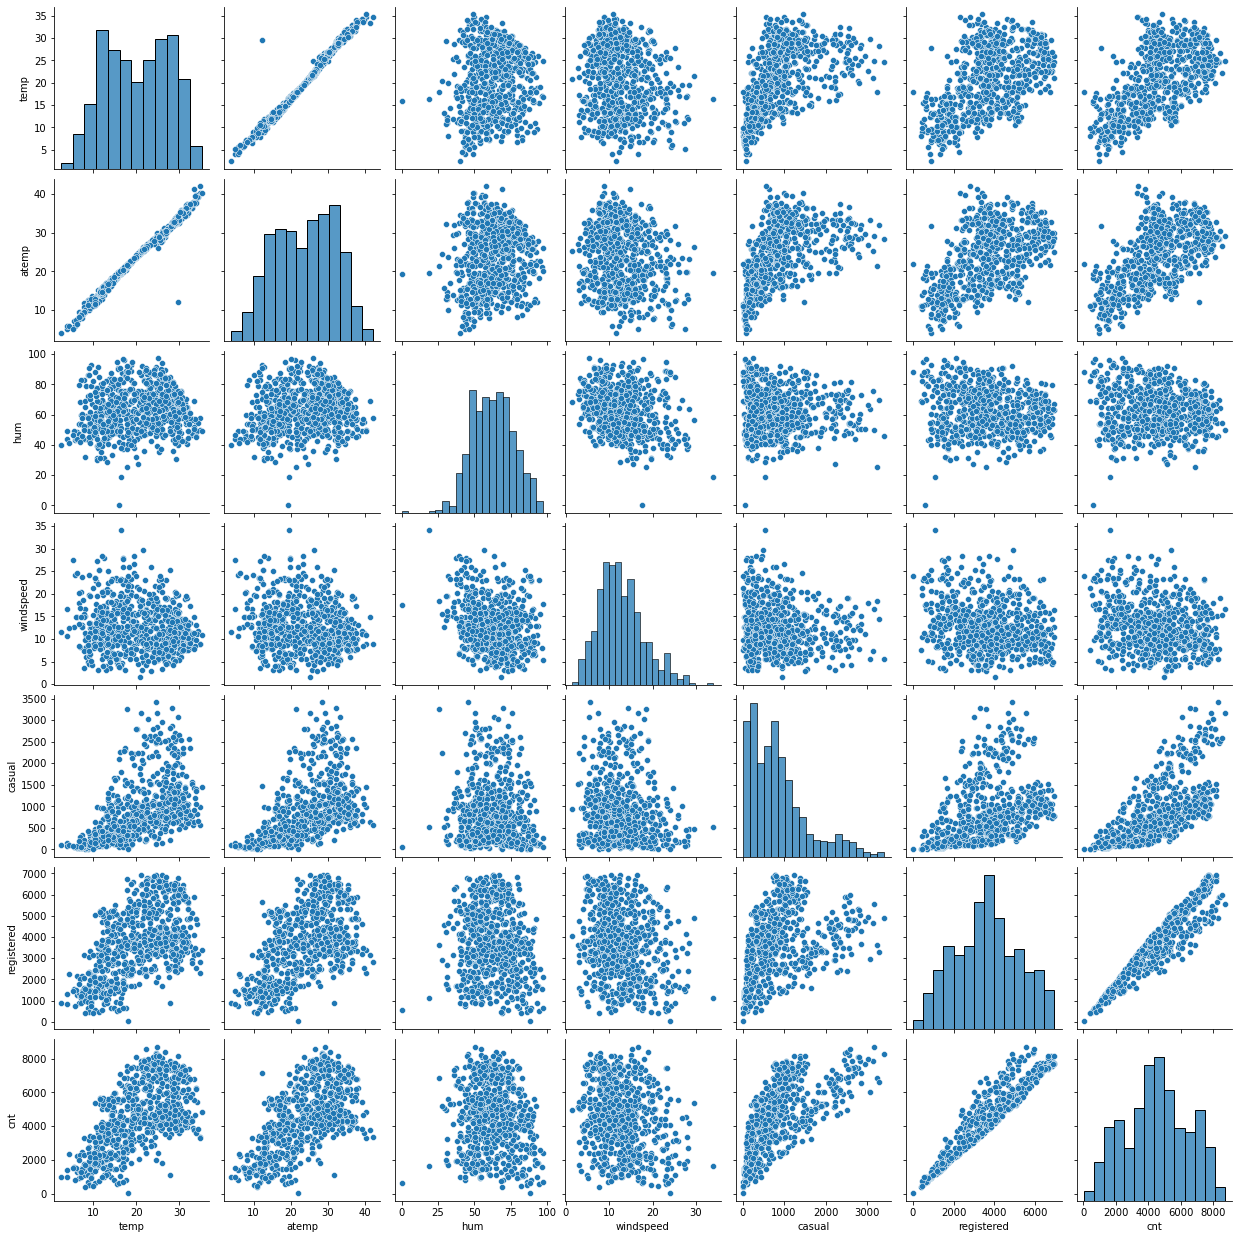

In [8]:
plt.figure(figsize=(15,10))
num_vars =["temp","atemp","hum","windspeed","casual","registered","cnt"]
sns.pairplot(day[num_vars])
plt.show()

1. We can observe some correlation some variables. Windspeed and hum plots look more scattered.

BOXPLOT FOR CATEGORICAL VARIABLES

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

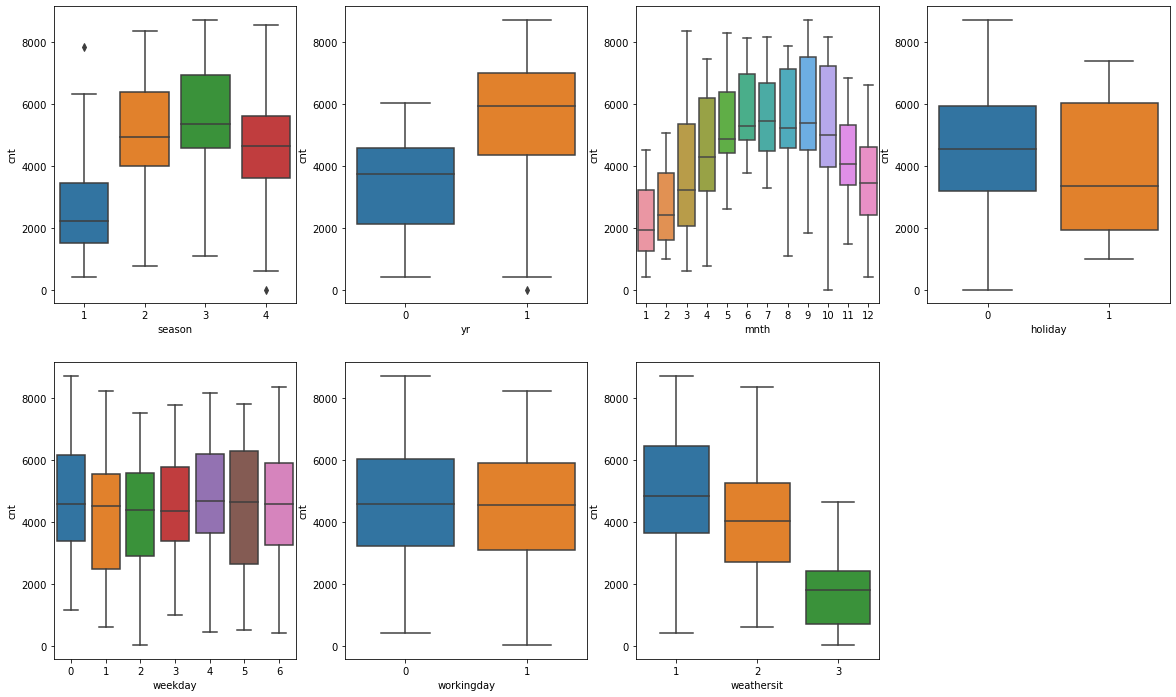

In [9]:
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=day)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=day)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data=day)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=day)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=day)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=day)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=day)


1. SEASON - spring season has highest median and winter has lowest. It was very clear that the business increased from spring to fall and decreased in Winter. However, "cnt" did not decrease much as compared to Spring.
2. Year - 2019 has more count of rental bikes compared to 2018.
3. Month - cnt followed a curve which increased from month 1 to month 6 and started declining from 7-12. It followed similar trend as Season.
4. Holiday - Holiday have less count compared to non-holiday.
5. Weekday - There is not much difference in "cnt" through the week. The medians for all the weekdays are almost same. 
6. Working day - There is slight difference in "cnt" for working and non-working days.
7. Weathersit - The count declined from 1 to 3 categories and 4 category did not have much number of bookings.

Dropping columns 

1. Dropping "instant" column as dropping this column doesnot affect the dataset.
2. Dropping "dteday" as we already have "yr","mnth","weekday" in the dataset.
3. Dropping "casual" and "registered" columns as they both add up to "cnt" column.

In [10]:
day=day.drop(["instant","dteday"],axis=1)

In [11]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


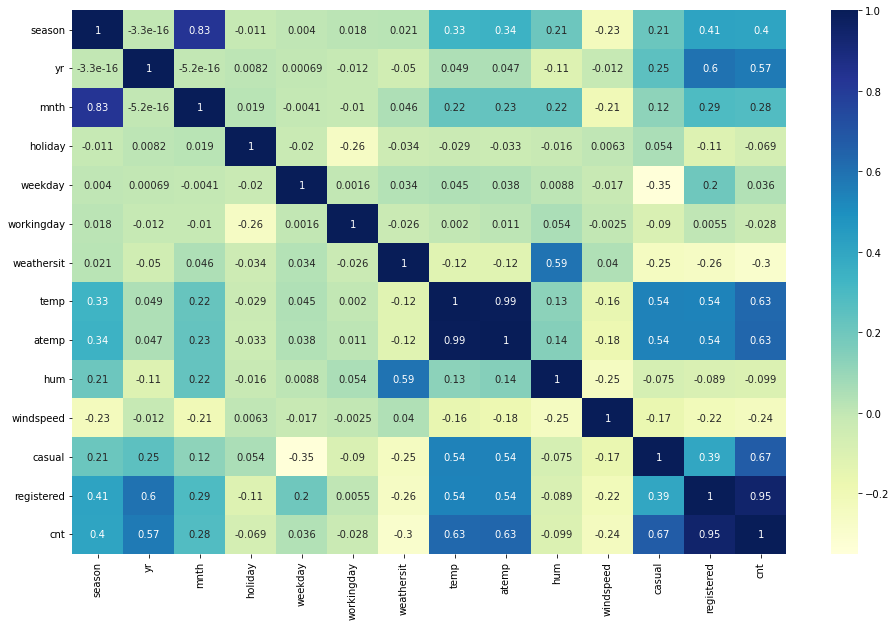

In [12]:
#Checking correlations
plt.figure(figsize=(16,10))
sns.heatmap(day.corr(),annot=True,cmap="YlGnBu")
plt.show()

1. "temp" and "atemp" has highest correlation with "cnt".
2. "weekday" has lowest correlation.
3. "holiday","workingday","weathersit" and "hum" have negative correlations.

Changing season, weathersit, month and weekday into categorical variables.

In [13]:
day.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

day.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

day.mnth = day.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

day.weekday = day.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
day=day.drop(["casual","registered"],axis=1)

In [16]:
# Analysing each variable w.r.t "cnt"

# temp vs cnt

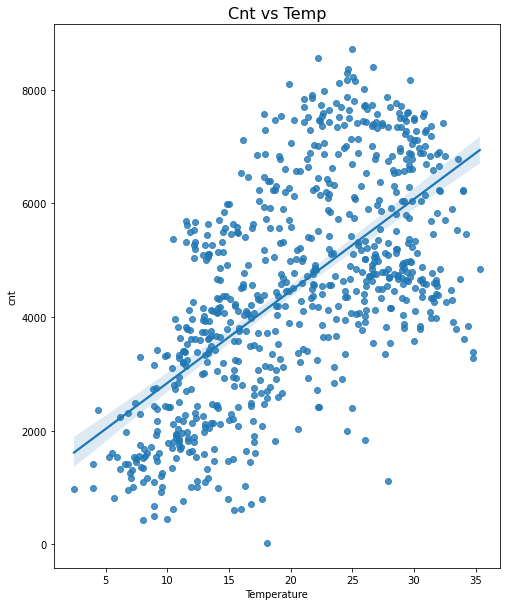

In [17]:
plt.figure(figsize=(8,10))
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=day,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

"cnt" and "temp" plot looks correlated.

# cnt vs hum

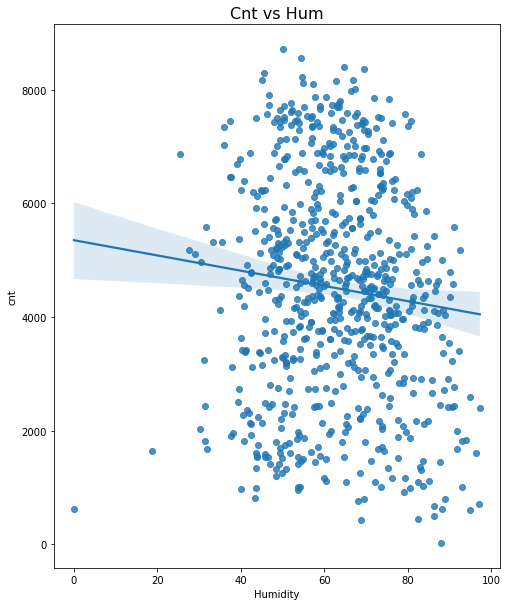

In [18]:
plt.figure(figsize=(8,10))
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=day,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

"cnt" and "hum" plot looks very scattered.

# cnt vs windspeed

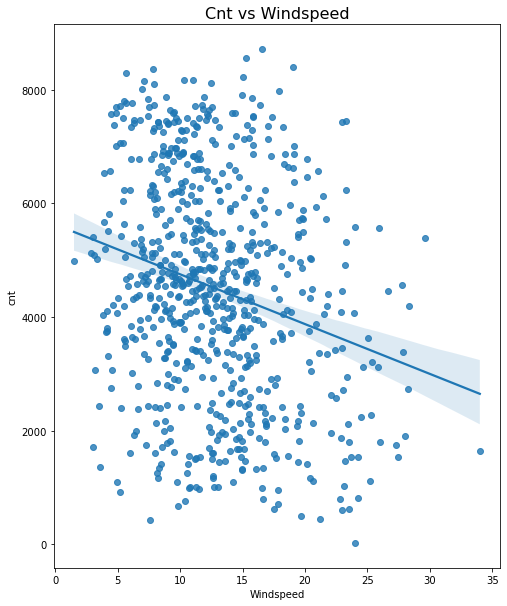

In [19]:
plt.figure(figsize=(8,10))
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=day,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

"cnt" and "windspeed" plot looks highly scaterred.

Creating dummy variables for "season","mnth","weekday" and "weathersit" and dropping one of the columns from dummy tables.

In [20]:
day = pd.get_dummies(data=day,columns=["season","mnth","weekday"],drop_first=True)
day = pd.get_dummies(data=day,columns=["weathersit"])

In [21]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [71]:
day.shape

(730, 30)

Now the columns(variables) have increased to 30.

# Splitting the data 

In [23]:
y=day.pop('cnt')
x=day
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [24]:
print(x_train.shape)
print(x_test.shape)

(511, 30)
(219, 30)


Scaling the variables using Normalization

In [26]:
cont_vars = ["temp","atemp","hum","windspeed"]
scaler = MinMaxScaler()
x_train[cont_vars]=scaler.fit_transform(x_train[cont_vars])

In [27]:
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
x_train.value_counts

<bound method DataFrame.value_counts of      yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
..   ..      ...         ...       ...       ...       ...        ...   
578   1        0           1  0.863973  0.824359  0.679690   0.187140   
53    0        0           1  0.202618  0.218747  0.435939   0.111379   
350   0        0           1  0.248216  0.223544  0.577930   0.431816   
79    0        0           1  0.462664  0.434043  0.759870   0.529881   
520   1        0           1  0.600225  0.586515  0.632030   0.359599   

     season_spring  season_summer  season_winter  ...  mnth_sept  weekday_mon  \
65

# Model using RFE and Automated Approach

Number of features to be selected by RFE is taken as 15.

In [30]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
rfe=RFE(lr,15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [32]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

Function to build a model using statsmodel api

In [33]:
def build_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm

Function to calculate VIFs

In [34]:
def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

Features selected by RFE 

In [35]:
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

Features not selected by RFE 

In [36]:
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [37]:
x_train_rfe = x_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','weathersit_moderate']]

In [38]:
x_train_rfe.shape

(511, 15)

# Model 1 - start with all variables selected by RFE

In [39]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.49e-189
Time:                        18:15:18   Log-Likelihood:                -4122.3
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1356.6029    

1. mnth_nov and mnth_jan have insignificant p-values.
2. weathersit_good, weathersit_moderate and season_spring have insignificant VIF values. 
3. First remove mnth_nov and mnth_jan, check with the values and then remove the high VIF value columns accordingly.


# Model - 2 

Removing mnth_nov and mnth_jan

In [40]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.12e-190
Time:                        18:15:19   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1241.2278    

1. After removing those columns, all the variables have significant p-values
2. However, weathersit_good and weathersit_moderate have high VIF values.

# Model - 3

Removing weathersit_good and weathersit_moderate

In [41]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.64e-186
Time:                        18:15:19   Log-Likelihood:                -4137.9
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     499   BIC:                             8351.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2795.3710    301.265      9.

1. Removed weathersit_good and weathersit_moderate columns.
2. Though all the variables have significant p-values, "hum" and "temp" habe insignificant VIF values.
3. We cannot remove "temp" from the model, as "temp" is an important predictive variable for the business.

# Model -4

Keeping weathersit_good, weathersit_moderate and removing hum

In [42]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.09e-187
Time:                        18:15:19   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 518.0653    

1. Keeping weathersit_good and weathersit_moderate as they are related to "cnt" moderately, we need to check this further before dropping.
2. Dropping "hum" as "hum" has very low coefficient with "cnt" and high VIF.

# Model -5 

Removing weathersit_moderate 

In [43]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.09e-187
Time:                        18:15:19   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1048.9385    256.068     

1. By removing weather_moderate with high VIF value, the VIF values of remaining predictive variables have come down and they are significant.
2. Even the p-values of the variables are pretty good and we need to further analyse other variables not selected by RFE.

# Model-6

Adding atemp to the model

In [44]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','atemp']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.24e-186
Time:                        18:15:19   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     498   BIC:                             8353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1048.8328    256.347     

Added "atemp" to the model and the VIF values of "temp" and "atemp" have become very high. This shows high multicollinearity. So, keeping any one variable is enough.


# Model - 7

Keeping temp and adding workingday

In [45]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.24e-187
Time:                        18:15:19   Log-Likelihood:                -4133.1
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     498   BIC:                             8347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1179.4793    261.072     

1. Removed "atemp".
2. Added "workingday", due to this the VIF value of "temp" has slightly increased. The p-values of the variables are also significant.

# Model - 8

Adding mnth_jun,mnth_aug as cnt is in peak in those months.
Adding weekday_sun as weekday variable is not chosen by RFE and sunday is enough to predict the cnt w.r.t day as the median for cnt throughout the week was almost same.

In [46]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','mnth_jun','mnth_aug','weekday_sun']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          4.54e-184
Time:                        18:15:19   Log-Likelihood:                -4132.7
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     495   BIC:                             8365.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1066.8474    303.180     

1. Adding weekday_sun to the model,the VIF value of "temp" increased drastically. So, it is not a wise decision to add this variable to the model.

In [47]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_sun']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.08e-186
Time:                        18:15:19   Log-Likelihood:                -4133.0
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8353.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1148.6774    271.942     

1. Adding mnth_aug and mnth_jun proved insignificant.
2. Even weekday_sun should be removed to make the variables significant.

# Model - 9

In [48]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_mon', 'weekday_sat','weekday_thu', 'weekday_tue', 'weekday_wed']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     151.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.54e-183
Time:                        18:15:19   Log-Likelihood:                -4129.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     493   BIC:                             8370.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1203.5324    268.348     

In [49]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_mon','weekday_thu', 'weekday_tue', 'weekday_wed']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     161.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.22e-184
Time:                        18:15:19   Log-Likelihood:                -4129.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     494   BIC:                             8364.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1172.2997    260.739     

In [50]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_mon',  'weekday_tue', 'weekday_wed']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.03e-185
Time:                        18:15:19   Log-Likelihood:                -4129.4
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     495   BIC:                             8359.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1169.0887    260.532     

In [51]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_mon',  'weekday_tue']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.71e-186
Time:                        18:15:19   Log-Likelihood:                -4129.6
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     496   BIC:                             8353.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1164.1204    260.194     

In [52]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_tue']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          6.75e-187
Time:                        18:15:19   Log-Likelihood:                -4131.4
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     497   BIC:                             8350.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1156.1467    260.813     

In [53]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_tue','mnth_dec','mnth_feb','mnth_mar','mnth_may','mnth_oct']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.13e-183
Time:                        18:15:19   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     492   BIC:                             8371.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1333.7412    269.518     

In [54]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_tue','mnth_mar','mnth_oct']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.67e-186
Time:                        18:15:19   Log-Likelihood:                -4127.3
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     495   BIC:                             8354.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1275.6349    264.062     

In [55]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','workingday','weekday_tue','mnth_mar']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.29e-186
Time:                        18:15:19   Log-Likelihood:                -4129.3
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     496   BIC:                             8352.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1180.4832    260.290     

1. Added all weekdays and removed one by one as per insignificance.
2. Kept weekday_tue and removed all. Though weekday_tue is insignificant as it has p-value 0.07.
3. However, for further analysis weekday_tue is not removed.

# Model - 10

In [56]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','weekday_tue','mnth_mar']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          4.21e-187
Time:                        18:15:19   Log-Likelihood:                -4130.9
No. Observations:                 511   AIC:                             8290.
Df Residuals:                     497   BIC:                             8349.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1079.5937    254.487     

1. Added months one by one and checked the significance. mnth_mar is found significant.
2. Removed workingday
3. All the variables have significant p-values and significant VIF values.
4. R squared and adj. R squared difference is also very less.(0.04)
5. Finalized this model for the data set.

Build a model with all columns which select features automatically 

# Automated Approach

In [57]:
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [58]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','weekday_tue','mnth_mar']

lr = build_model_sk(x_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1079.5936563471955 [ 2038.27163015  -805.29548446  4261.21247998 -1288.30194181
  -643.84576807   378.41640356   738.80711559  -427.00574682
   673.0866389  -1818.66765627   700.95304136  -227.80818386
   262.06007689]


# Residual Analysis

In [59]:
y_train_pred = lr.predict(x_train[cols])

<AxesSubplot:xlabel='cnt', ylabel='Density'>

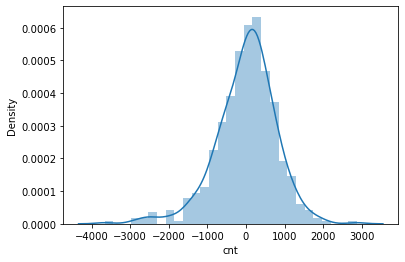

In [60]:
res = y_train-y_train_pred
sns.distplot(res)

Actual Versus Predicted

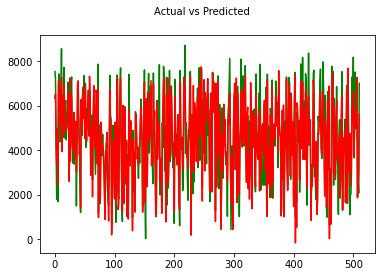

In [61]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 10)
plt.show()

r2_score 

In [62]:
r2_score(y_train,y_train_pred)

0.8383999161423497

Linearity Check 

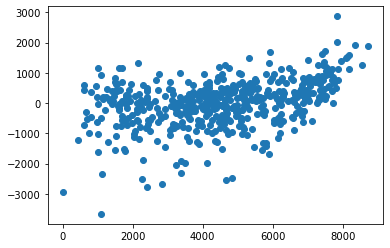

In [63]:
res = (y_train - y_train_pred)
plt.scatter(y_train,res)
plt.show()

# Test Data Evaluation

Scaling 

In [64]:
cont_vars = ["temp","atemp","hum","windspeed"]
scaler = MinMaxScaler()
x_test[cont_vars]=scaler.fit_transform(x_test[cont_vars])

In [65]:
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter','mnth_jul',
       'mnth_sept', 'weathersit_bad', 'weathersit_good','weekday_tue','mnth_mar']

In [66]:
y_test_pred = lr.predict(x_test[cols])

In [67]:
r2_score(y_test,y_test_pred)

0.7924330566780042

# Homoscedacity

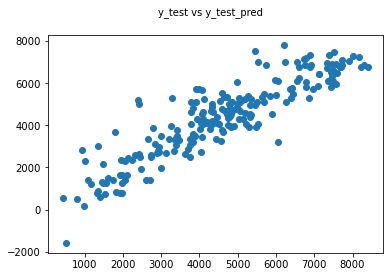

In [68]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 10)              
plt.show()

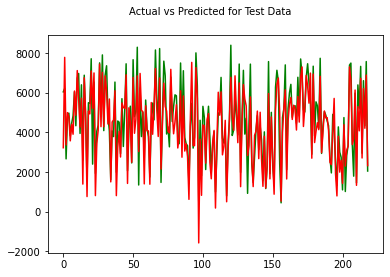

In [69]:
c = [i for i in range(0,len(x_test),1)]
plt.plot(c,y_test, color="green")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted for Test Data', fontsize = 10)
plt.show()

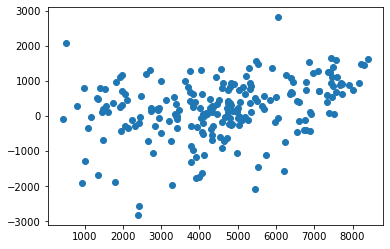

In [70]:
res = (y_test - y_test_pred)
plt.scatter(y_test,res)
plt.show()

1.Standard errors are normally distributed with mean 0.
2. Actual and predicted plots almost followed same pattern.
3. R2_score value is also same as in the model. 
4. The linearity check for the model also seems good.


1.R2_score for test data is 0.792 where as train test model – X have 0.838. There is not much difference between the two, this is a good value hence, we can see that the model X is performing good on test data.
2.Homoscedacity – the error terms did not change much as the value of the predictor variable changes. 
3.Plot between test data and actual are also very close.
4.The error terms plot also scattered, therefore output is well explained by the model.


# Predictions 

The company should focus on the following:
1.The company should not expand its business in the fall of the year.
2.It can expand its business in the month of march, July and September. 
3.There could be less bookings when the weather is misty and heavy rains.
4.It can be predicted that bookings increase once situation gets normal compared with 2019 bookings.


# Significant Variables

1.Year 2019 
2.Holiday
3.Temp
4.Windspeed
5.Season – spring, summer and winter
6.Month – march, July, September 
7.Weathersit – bad and good
8.weekday - Tuesday
